In [ ]:
from sklearn.datasets import fetch_openml # import fetch_openml from sklearn datasets
import numpy as np
mnist = fetch_openml('mnist_784',cache=True, version=1) #read the mnist data using fetch_openml and
mnist.keys()

In [ ]:
mnist['target']


In [ ]:
mnist.target=mnist.target.astype(np.int8)

In [ ]:
mnist['data']

In [ ]:
print(mnist['DESCR'])

In [ ]:
np.unique(mnist['target'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [ ]:
X, y = mnist["data"], mnist["target"]

In [ ]:
X , y = X.values , y.values

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

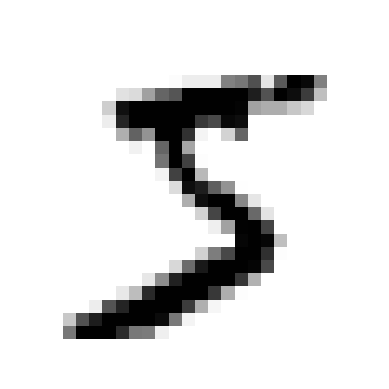

In [ ]:
some_digit = X[0]
# some_digit = np.array(some_digit)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
X.shape

(70000, 784)

In [ ]:
y=y.astype(np.uint8)

In [ ]:
y[4]

9

In [ ]:
digit=X[0]# extract the 426 row vector

In [ ]:
digit=digit.reshape(28,28)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=matplotlib.cm.binary) #cmap is used to remove the grey scale image
plt.axis("off")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# X_train & y_train = starts from 0 till 59999
# X_test & y_test= from 60000 till the end

In [ ]:
shuffling_index=np.random.permutation(60000)
shuffling_index # produces the random permutation of shuffle. Some learning algorithms are sensitive
#they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen


X_train,y_train=X_train[shuffling_index],y_train[shuffling_index]

# Binary Classifier

In [ ]:
y_train_5 = y_train==5 #target vectors for classification task to distinguish whether its 5 or not
y_test_5= y_train==5

In [ ]:
from sklearn.linear_model import SGDClassifier


In [ ]:
sgd_clf = SGDClassifier(max_iter=20,tol=1e-2) #variable sgd_clf is initialised Classifier object
sgd_clf.fit(X_train, y_train_5) #its trained with sample 6




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=20, tol=0.01)

In [ ]:
sgd_clf.predict([X[3]])

array([False])

In [ ]:
y_train_pred = sgd_clf.predict(X_train)

y[11]

5

# Performance Measures

# Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54140,   439],
       [ 5363,    58]])

In [ ]:
from sklearn import metrics

In [ ]:
print(
f"Classification report for classifier {sgd_clf}:\n"
f"{metrics.classification_report(y_train_5, y_train_pred)}\n"
)

Classification report for classifier SGDClassifier(max_iter=20, tol=0.01):
              precision    recall  f1-score   support

       False       0.91      0.99      0.95     54579
        True       0.12      0.01      0.02      5421

    accuracy                           0.90     60000
   macro avg       0.51      0.50      0.48     60000
weighted avg       0.84      0.90      0.87     60000




# Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_5, y_train_pred)

0.11670020120724346

In [ ]:
# 4013/(4013+1337)

In [ ]:
recall_score(y_train_5, y_train_pred)

0.010699133001291274

# F1 score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_train_5, y_train_pred)

0.019601216627238932

# Precision/Recall trade-off

In [ ]:
index=11
y_scores = sgd_clf.decision_function([X[index]])
y_scores

array([-3959.99268609])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
threshold = 200000
(y_scores > threshold)

array([False])

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
precisions

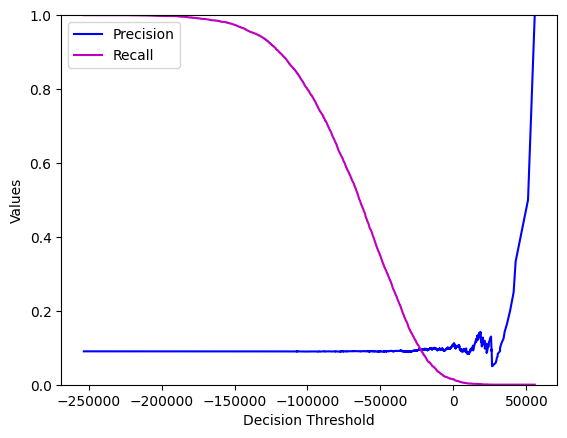

In [ ]:
plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
plt.plot(thresholds, recalls[:-1], "m-", label="Recall")
plt.xlabel('Decision Threshold')
plt.ylabel('Values')
plt.legend()
plt.ylim([0,1])
plt.show()

(0.0, 1.0, 0.0, 1.0)

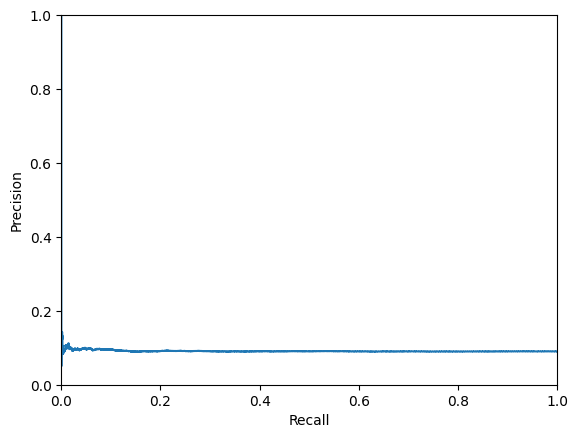

In [ ]:
plt.plot(recalls,precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0,1,0,1])

In [ ]:
recalls

array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.8446781e-04,
       1.8446781e-04, 0.0000000e+00])

In [ ]:
recalls>0.8

array([ True,  True,  True, ..., False, False, False])

# ROC Curve

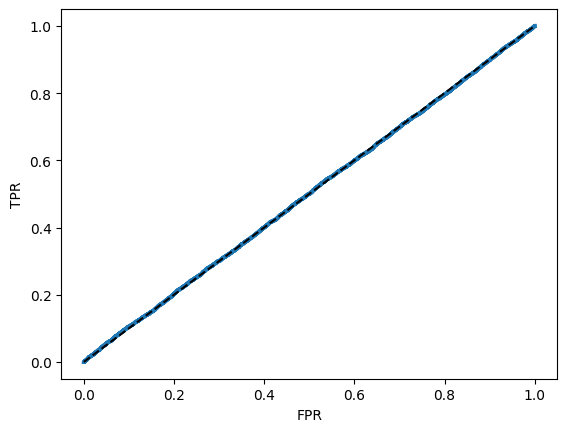

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=3, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
  plt.xlabel('FPR')
  plt.ylabel('TPR')

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.4998826370493946

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # we need scores = probabality of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

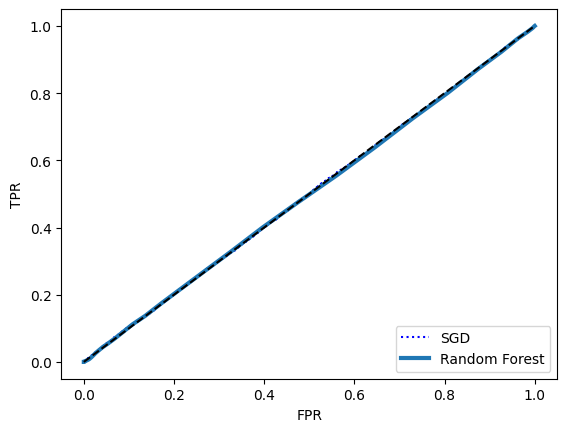

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.49873283366381155